# H3 chimeric library design

In [1]:
import pandas as pd
# import dms_tools2
import numpy as np
from Bio import SeqIO

from plotnine import *
%matplotlib inline

First, generate a consolidated dataframe of deleterious mutants. 

In `./initial_prefs_analysis/analyze_h3_prefs.ipynb`, we generated a csv of mutations in Perth09 that were as deleterious to virus growth as 75% of stop codon mutations. This was based off of DMS data from Lee et al. (2019). The output file can be found in `./data/del_muts_75quant.csv`.

John Huddleston then used sequence alignments to identify which of these 'deleterious' mutants are actually found in natural H3 sequences, at a minimum frequency of 0.5%. This data can be found in `./data/mutations_to_keep.csv`.

In [2]:
del_muts = pd.read_csv('data/del_muts_75quant.csv')
nat_variants = pd.read_csv('data/mutations_to_keep.csv')

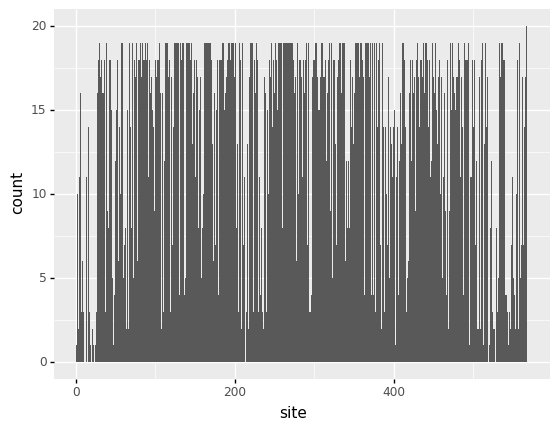

<ggplot: (8730137623242)>

In [3]:
# look at distributions of deleterious mutants and where the naturally occurring sequence
# variants are
# ggplot(data=del_muts, mapping=aes(x='site')) + geom_histogram(color='white', binwidth=10)
ggplot(data=del_muts, mapping=aes(x='site')) + geom_histogram(binwidth=1)

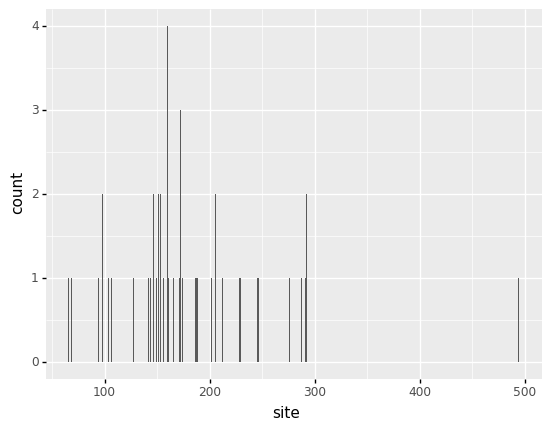

<ggplot: (8730133253849)>

In [4]:
# ggplot(data=nat_variants, mapping=aes(x='site')) + geom_histogram(color='white', binwidth=10)
ggplot(data=nat_variants, mapping=aes(x='site')) + geom_histogram(binwidth=1)

In [6]:
print(del_muts.loc[del_muts['site'] == 494])

      site wildtype mutant mutation    effect  log2effect
6862   494        I      A    I494A  0.073403   -3.768009
6863   494        I      C    I494C  0.069242   -3.852217
6864   494        I      D    I494D  0.069164   -3.853826
6865   494        I      E    I494E  0.285335   -1.809273
6866   494        I      F    I494F  0.245041   -2.028907
6867   494        I      G    I494G  0.122668   -3.027164
6868   494        I      H    I494H  0.061381   -4.026060
6869   494        I      K    I494K  0.113635   -3.137518
6870   494        I      L    I494L  0.302086   -1.726968
6871   494        I      M    I494M  0.263378   -1.924791
6872   494        I      N    I494N  0.143652   -2.799348
6873   494        I      P    I494P  0.203558   -2.296485
6874   494        I      Q    I494Q  0.092255   -3.438234
6875   494        I      R    I494R  0.103919   -3.266469
6876   494        I      S    I494S  0.062841   -3.992159
6877   494        I      T    I494T  0.107228   -3.221247
6878   494    

In [7]:
nat_variants

,site,wildtype,mutant,mutation,effect,log2effect,frequency_in_nature
0,66,E,G,E66G,0.115085,-3.119223,0.068126
1,69,D,N,D69N,0.371865,-1.427149,0.067769
2,94,D,S,D94S,0.290189,-1.784933,0.006444
3,98,K,E,K98E,0.356398,-1.488439,0.005072
4,98,K,R,K98R,0.309683,-1.691138,0.012028
5,104,V,I,V104I,0.273027,-1.872885,0.005004
6,107,S,N,S107N,0.149207,-2.744616,0.069132
7,128,V,I,V128I,0.211474,-2.241448,0.010545
8,142,N,D,N142D,0.373165,-1.422113,0.009159
9,144,T,A,T144A,0.231193,-2.112833,0.222430


In [5]:
# add back in natural sequence variants to the deleterious mutants list
del_muts_index = del_muts.set_index(['mutation']).index
nat_variants_index = nat_variants.set_index(['mutation']).index
mask = ~del_muts_index.isin(nat_variants_index)
del_muts_final = del_muts.loc[mask]
del_muts_final

,site,wildtype,mutant,mutation,effect,log2effect
0,1,M,P,M1P,0.067935,-3.879703
1,2,K,A,K2A,0.091279,-3.453576
2,2,K,C,K2C,0.200545,-2.318004
3,2,K,D,K2D,0.208715,-2.260392
4,2,K,E,K2E,0.156098,-2.679475
...,...,...,...,...,...,...
7592,567,*,S,*567S,0.123454,-3.017960
7593,567,*,T,*567T,0.108684,-3.201789
7594,567,*,V,*567V,0.124720,-3.003234
7595,567,*,W,*567W,0.251109,-1.993617


In [8]:
# These epitopes are listed in HA1 numbering
epitopes_ha1 = [193, 142, 135, 138, 160, 186, 159, 261, 121, 128, 131, 144, 
                198, 171, 190, 197, 62, 192, 83, 92, 311, 326]

# convert to sequential numbering for this analysis
epitopes = [i+16 for i in epitopes_ha1]

epitopes_df = pd.DataFrame({'epitope_site': epitopes})
epitopes_df

,epitope_site
0,209
1,158
2,151
3,154
4,176
5,202
6,175
7,277
8,137
9,144


In [10]:
# add back in natural sequence variants to the deleterious mutants list
epitopes_index = epitopes_df.set_index(['epitope_site']).index

del_muts_index = del_muts_final.set_index(['site']).index

mask = del_muts_index.isin(epitopes_index)

del_epitopes = del_muts_final.loc[mask]
del_epitopes


# nat_variants_index = nat_variants.set_index(['mutation']).index
# mask = ~del_muts_index.isin(nat_variants_index)
# del_muts_final = del_muts.loc[mask]
# del_muts_final

,site,wildtype,mutant,mutation,effect,log2effect
738,78,K,C,K78C,0.197549,-2.339720
739,78,K,F,K78F,0.232402,-2.105308
740,78,K,P,K78P,0.107070,-3.223376
741,78,K,S,K78S,0.210719,-2.246608
742,78,K,T,K78T,0.278871,-1.842328
...,...,...,...,...,...,...
4675,342,K,G,K342G,0.120242,-3.055991
4676,342,K,M,K342M,0.253790,-1.978291
4677,342,K,N,K342N,0.188694,-2.405883
4678,342,K,P,K342P,0.370403,-1.432831


In [16]:
p = ggplot(data=del_epitopes, mapping=aes(x='site')) + geom_histogram(binwidth=1)
ggsave(plot=p, filename='../../sanger_seq/del_epitope_muts.png')

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../../sanger_seq/del_epitope_muts.png


Now that we have our final list of deleterious mutants, we want to remove these from our mutant libraries for other H3 strains.

In [10]:
def gen_mutant_list(wt_fasta, mut_sites, del_muts_df):
    """
    This function generates a list of single mutants to be included in a DMS library. 
    
    `wt_fasta`: a `.fasta` file with a single H3 sequence. 
    `mut_sites`: a tuple containing first and last position to mutate. 
    `del_muts_df`: a df of deleterious mutants, including a 'mutation'column with entries 
    in format `N#N`.
    
    Output: a df of single mutations to include in the library. AA variants that were
    deleterious in the Perth09 background are removed, regardless of wt AA at that site.
    """
    
    # read in just the first entry of the sequence file
    wt_nts = next(SeqIO.parse(wt_fasta, 'fasta'))

    # translate from nucleotide sequence
    wt_seq = wt_nts.seq.translate()
    
    # make sure sequence to mutate is same length as Perth09
    # since we're matching disallowed mutations by site number
    assert len(wt_seq) == 567
    
    # turn wt_seq into a dataframe with sites and mutants
    site = 1
    sites = []
    wildtype = []
    mutants = []
    
    aa_list = dms_tools2.AAS # note that I am NOT including mutations to stop codons
    
    for wt in wt_seq:
        for aa in aa_list:
            wildtype.append(wt)
            mutants.append(aa)
            sites.append(site)
        site += 1
    
    df = pd.DataFrame({'site': sites,
                       'wildtype': wildtype,
                       'mutant': mutants
                      })
    
    # drop any 'mutants' that don't actually change the wt AA
    df = df[df['wildtype'] != df['mutant']]
    
    # add general mutation column
    # note that we're just using site and mutant, and not original aa, to generalize
    # for wt sequences other than Perth09
    cols = ['site', 'mutant']
    df['gen_mut'] = df[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
    
    # limit to range of sites defined by mut_sites
    df = df.loc[((df['site'] >= mut_sites[0]) & (df['site'] <= mut_sites[1]))]
    
    # cull mutations also seen in del_muts_df
    del_muts_df['gen_mut'] = del_muts_df['mutation'].str[1:] # remove original Perth09 aa from mutation
    
    df_index = df.set_index(['gen_mut']).index
    del_muts_index = del_muts_df.set_index(['gen_mut']).index
    mask = ~df_index.isin(del_muts_index)
    df_final = df.loc[mask]

    # print stats
    print(f"{len(df_final)} mutations are in the library")
    print(f"These mutations are across {len(df_final['site'].unique().tolist())} sites")
    print('Here is the distribution of mutations across sites:')
    
    # plot distribution of mutations across sites
#     p = (ggplot(data=df_final, mapping=aes(x='site')) + geom_histogram(color='white', binwidth=10))
    p = (ggplot(data=df_final, mapping=aes(x='site')) + geom_histogram(binwidth=1))
    p.draw()
    
    sequence_name = wt_fasta.replace('data/', '').replace('.fasta', '')
    
    # save plot to results
    ggsave(plot = p, filename = f'results/mut_dist_{sequence_name}.png')
    
    # save as .csv file in results dir
    df_final.to_csv(f'results/targeted_mutations_{sequence_name}.csv', index=False)
    
    return df_final

### Generate set of targeted mutations

We're mutating from the third codon of the ectodomain to the end of the ectodomain. This is because the first two ectodomain codons have been edited slightly in the chimeric construct, which will be described more later. In sequential numbering for the WT sequences, this range is from codon 19 to codon 520.

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2505 mutations are in the library
These mutations are across 371 sites
Here is the distribution of mutations across sites:


/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: results/mut_dist_hk-45-2019.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


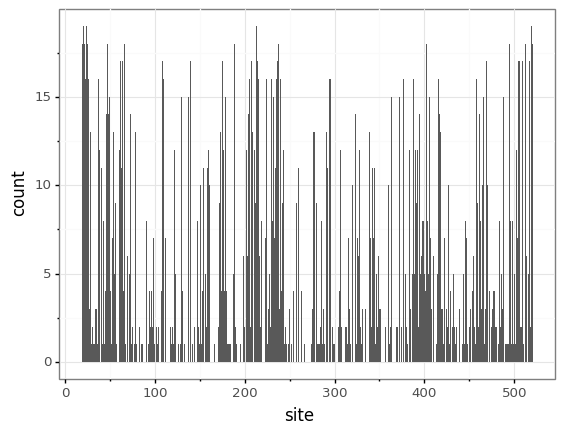

In [11]:
hk19 = gen_mutant_list('data/hk-45-2019.fasta', (19,520), del_muts_final)

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2505 mutations are in the library
These mutations are across 371 sites
Here is the distribution of mutations across sites:


/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: results/mut_dist_ks-14-2017.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


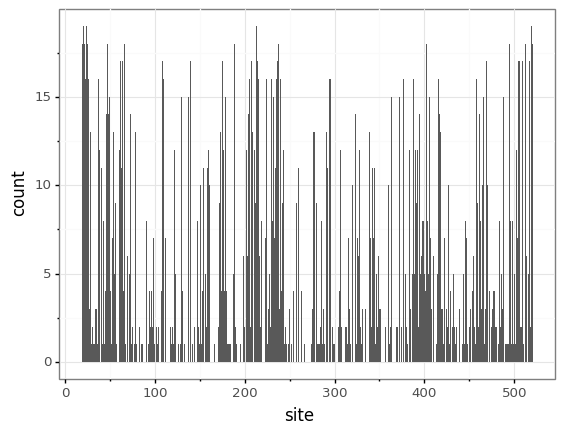

In [12]:
ks17 = gen_mutant_list('data/ks-14-2017.fasta', (19,520), del_muts_final)

### Double check that the amount of excluded mutations lines up with the size of this final targeted library mutations list.

In [19]:
# limit del_muts_final to the same AA range as mutated sequence (codons 19-520)
del_muts_subset = del_muts_final[(del_muts_final['site'] >= 19) & (del_muts_final['site'] <= 520)]
len(del_muts_subset)

7033

For codons 19-520, there are 502 amino acids sites to be mutated. Each site has 19 possible mutations (excluding stop codons).

In [20]:
final_mutation_number = (502 * 19) - len(del_muts_subset)
final_mutation_number

2505

This calculation gives us 2,505 remaining mutations in the library, which lines up with the output library size for both HK/19 and KS/17.